<h1 style="text-align: center; font-weight: bold;">Individual Planning Report</h1>

### Data Description

In [3]:
#First, load the packages
library(tidymodels)
library(tidyverse)
library(dplyr)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conf

Since the CSV files of the source for the datasets are uploaded in the GitHub repository, we will read the data from it

In [4]:
players <- read_csv("https://raw.githubusercontent.com/HollieHuang666/Dsci-100-Individual-Planning-Report/main/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


The dataframe has 196 rows and 7 columns, so there are also 196 objects as players and 7 variables. The variables are `experience`, `subscribe`, `hashedEmail`, `played_hours`, `name`, `gender`, and `Age`, with types character, logical, character, double, character, character, and double respectively.

`experience` indicates the player’s skill level (beginner, amateur, veteran, or pro). `subscribe` is a logical variable showing whether the player subscribed to the game newsletter. `hashedEmail` contains privacy-protected email identifiers. `played_hours `records the total hours played, and `name`, `gender`, and `Age` describe the name, gender and age of each player.

<table>
  <caption><strong>Player Data: Variables & Descriptions</strong></caption>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>experience</code></td>
      <td>character</td>
      <td>Player skill level: beginner, regular, amateur, veteran, or pro.</td>
    </tr>
    <tr>
      <td><code>subscribe</code></td>
      <td>logical</td>
      <td>Whether the player subscribed to the game newsletter (TRUE/FALSE).</td>
    </tr>
    <tr>
      <td><code>hashedEmail</code></td>
      <td>character</td>
      <td>Hashed email identifier (stored for privacy).</td>
    </tr>
    <tr>
      <td><code>played_hours</code></td>
      <td>double</td>
      <td>Total hours the player has played.</td>
    </tr>
    <tr>
      <td><code>name</code></td>
      <td>character</td>
      <td>Player's name.</td>
    </tr>
    <tr>
      <td><code>gender</code></td>
      <td>character</td>
      <td>Player's gender.</td>
    </tr>
    <tr>
      <td><code>Age</code></td>
      <td>double</td>
      <td>Player's age.</td>
    </tr>
  </tbody>
</table>


In [5]:
stats_played_hours <- tibble(
  played_hours_min = min(pull(players, played_hours)),
  played_hours_max = max(pull(players, played_hours)),
  played_hours_mean = mean(pull(players, played_hours)),
  played_hours_sd = sd(pull(players, played_hours)),
  played_hours_median = median(pull(players, played_hours))
)
stats_played_hours

stats_age <- tibble(
  age_min = min(pull(players, Age), na.rm = TRUE),
  age_max = max(pull(players, Age), na.rm = TRUE),
  age_mean = mean(pull(players, Age), na.rm = TRUE),
  age_sd = sd(pull(players, Age), na.rm = TRUE),
  age_median = median(pull(players, Age), na.rm = TRUE)
)
stats_age

played_hours_min,played_hours_max,played_hours_mean,played_hours_sd,played_hours_median
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,223.1,5.845918,28.35734,0.1


age_min,age_max,age_mean,age_sd,age_median
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,58,21.13918,7.389687,19


For the numeric variables of `played_hours` and `Age`, looking at the created tables above, `played_hours` ranges from 0 to 223.1, with a mean of 5.85, a median of 0.1, and a standard deviation of 28.36; `Age` ranges from 9 to 58, with a mean of 21.14, a median of 19 and a standard deviation of 7.39.

The data has several issues to consider, including missing values in the `Age` and `gender` columns that will need to be handled in our analysis. We also notice potential sampling biases - the data appears to skew toward younger male players with relatively low play hours, which could limit how well our findings apply to other types of players like older individuals, different genders, or more dedicated gamers.

In [6]:
#Now read the sessions.csv
sessions <- read_csv("https://raw.githubusercontent.com/HollieHuang666/Dsci-100-Individual-Planning-Report/refs/heads/main/sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


For the sessions dataframe, there are 1535 rows and 5 columns, so there are 1536 people as observations and a total of 5 variables.

<table>
  <caption><strong>Sessions Data: Variables & Descriptions</strong></caption>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>hashedEmail</code></td>
      <td>character</td>
      <td>Hashed email identifier (stored for privacy).</td>
    </tr>
    <tr>
      <td><code>start_time</code></td>
      <td>character</td>
      <td>Date and time of the day when the player starts playing converted from <code>original_start_time</code>.</td>
    </tr>
    <tr>
      <td><code>end_time</code></td>
      <td>character</td>
      <td>Date and time of the day when the player ends playing from <code>original_end_time</code>.</td>
    </tr>
    <tr>
      <td><code>original_start_time</code></td>
      <td>double</td>
      <td>Start time recorded in UNIX time as original data.</td>
    </tr>
    <tr>
      <td><code>original_end_time</code></td>
      <td>character</td>
      <td>End time recorded in UNIX time as original data.</td>
    </tr>
  </tbody>
</table>

For the sessions dataframe, there is one row that misses an `original_end_time`, so as `end_time`. This should be later be considered later when tidying or computing the data. Still, we can't say for sure how the data is collected, but it is likely recorded from the player enters the game to player exits the game.

### Broad Question: 
<em> What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? </em>

### Specific Question: 
<em>Can experience, age, and played hours predict number of subscription? </em>

For this question, `Gender` will be excluded from the predictive model to prevent the introduction of potential gender bias or ethical complications in the analysis.

For wrangling:
* remove NA values
* simplifying the dataframe by dropping `hashedEmail` and `name`
* convert `experience` as a factor

### Data Wrangling

In [14]:
players_wrangled <- players |>
    select(-hashedEmail,-name, -gender) |>
    mutate(experience = as_factor(experience)) |>
    drop_na()
glimpse(players_wrangled)

Rows: 194
Columns: 4
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


### Visualization

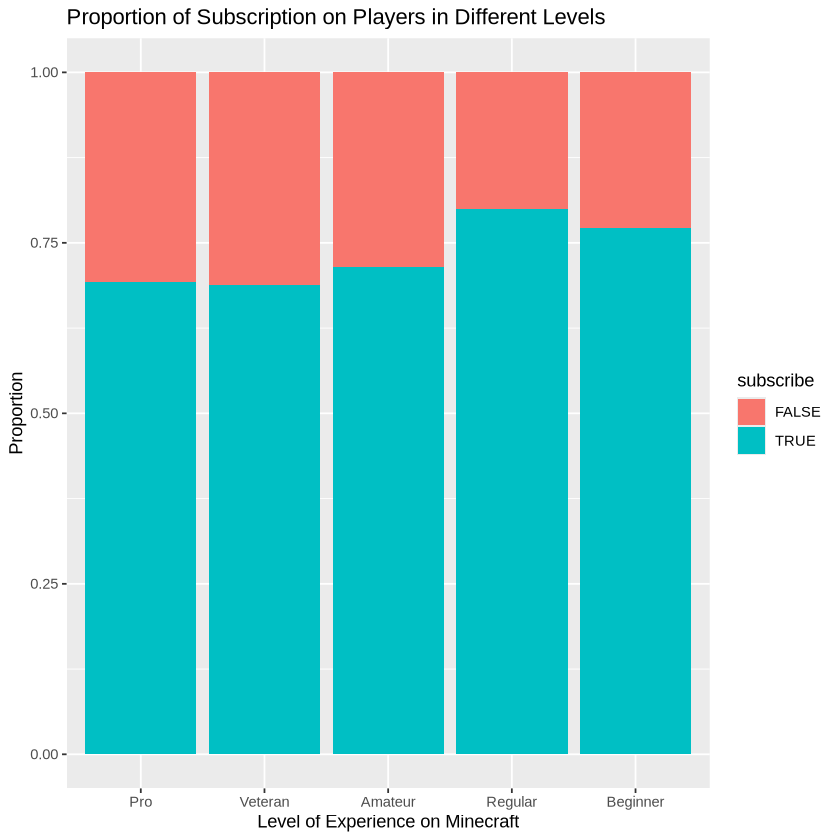

In [19]:
#create a barplot for experience
bar_experience <- ggplot(players_wrangled, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(x = "Level of Experience on Minecraft",
         y = "Proportion",
         title = "Proportion of Subscription on Players in Different Levels")
bar_experience

The bar graph above shows the proportions of subscriptions across different levels. Overall, the majority of players (~70%) choose the subscribe, and there is no big fluctuation in the proportion of 